<a href="https://colab.research.google.com/github/oathbringerUUU/Udemy-Data-Science-Python/blob/master/02_Biblioteka_Pandas/Case_Study_dane_gie%C5%82dowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Bibliotek

In [2]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.18.5
Pandas: 1.0.5


## Załadowanie danych

In [115]:
def fetch_financial_data(company='AMZN'):
  """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
  na serwisie stooq.pl"""
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data('FB')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-09-04 to 2015-09-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


## Eksploracja danych

In [11]:
df.head()

,open,high,low,close,volume
Date,,,,,
2020-09-04,3318.00,3381.50,3111.130,3294.62,8781754
2020-09-03,3485.00,3488.41,3303.000,3368.00,8161113
2020-09-02,3547.00,3552.25,3486.685,3531.45,3931476
2020-09-01,3489.58,3513.87,3467.000,3499.12,3476407
2020-08-31,3408.99,3495.00,3405.000,3450.96,4185885


In [12]:
df.tail()

,open,high,low,close,volume
Date,,,,,
2015-09-15,523.25,527.92,517.20,522.37,2865900
2015-09-14,529.44,532.45,518.58,521.38,3130200
2015-09-11,521.07,529.44,520.60,529.44,3227800
2015-09-10,515.15,526.13,514.78,522.24,2574927
2015-09-09,524.00,529.95,515.06,516.89,4370600


In [33]:
df.columns = [col.lower() for col in df.columns]
df.head(10)

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700
2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582
2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750
2019-11-29,1817.78,1824.69,1800.79,1800.80,1923440
2019-11-27,1801.00,1824.50,1797.31,1818.51,3023355


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.392836e+03,6.466088e+02,478.01,8.006825e+02,1450.220,1.820927e+03,3.547000e+03
high,1258.0,1.407155e+03,6.554982e+02,493.50,8.063850e+02,1469.495,1.832362e+03,3.552250e+03
low,1258.0,1.376778e+03,6.369201e+02,474.00,7.977337e+02,1425.980,1.803630e+03,3.486685e+03
close,1258.0,1.392935e+03,6.467934e+02,482.07,8.049775e+02,1451.400,1.819107e+03,3.531450e+03
volume,1258.0,4.273241e+06,2.147558e+06,881337.00,2.821104e+06,3709649.500,5.112217e+06,1.655260e+07


In [32]:
df = df['2019-12-10':]
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700
...,...,...,...,...,...
2015-09-15,523.25,527.92,517.20,522.37,2865900
2015-09-14,529.44,532.45,518.58,521.38,3130200
2015-09-11,521.07,529.44,520.60,529.44,3227800


## Selekcja kolumn

In [15]:
df = df.head(10)

In [34]:
df['open']

Date
2019-12-10    1747.40
2019-12-09    1750.66
2019-12-06    1751.20
2019-12-05    1763.50
2019-12-04    1774.01
               ...   
2015-09-15     523.25
2015-09-14     529.44
2015-09-11     521.07
2015-09-10     515.15
2015-09-09     524.00
Name: open, Length: 1072, dtype: float64

In [17]:
df.open

Date
2020-09-04    3318.00
2020-09-03    3485.00
2020-09-02    3547.00
2020-09-01    3489.58
2020-08-31    3408.99
2020-08-28    3423.00
2020-08-27    3450.05
2020-08-26    3351.11
2020-08-25    3294.99
2020-08-24    3310.15
Name: open, dtype: float64

In [19]:
df[['open', 'close']]

,open,close
Date,,
2020-09-04,3318.00,3294.62
2020-09-03,3485.00,3368.00
2020-09-02,3547.00,3531.45
2020-09-01,3489.58,3499.12
2020-08-31,3408.99,3450.96
2020-08-28,3423.00,3401.80
2020-08-27,3450.05,3400.00
2020-08-26,3351.11,3441.85
2020-08-25,3294.99,3346.49


In [21]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2020-09-04,3318.00,3294.62
2020-09-03,3485.00,3368.00
2020-09-02,3547.00,3531.45
2020-09-01,3489.58,3499.12
2020-08-31,3408.99,3450.96
2020-08-28,3423.00,3401.80
2020-08-27,3450.05,3400.00
2020-08-26,3351.11,3441.85
2020-08-25,3294.99,3346.49


In [22]:
df.iloc[:, -1]

Date
2020-09-04    8781754
2020-09-03    8161113
2020-09-02    3931476
2020-09-01    3476407
2020-08-31    4185885
2020-08-28    2896978
2020-08-27    4264795
2020-08-26    6508743
2020-08-25    3992842
2020-08-24    4666258
Name: volume, dtype: int64

In [24]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2020-09-04,3111.1300,3294.62,8781754
2020-09-03,3303.0000,3368.00,8161113
2020-09-02,3486.6850,3531.45,3931476
2020-09-01,3467.0000,3499.12,3476407
2020-08-31,3405.0000,3450.96,4185885
2020-08-28,3386.5000,3401.80,2896978
2020-08-27,3378.0000,3400.00,4264795
2020-08-26,3344.5675,3441.85,6508743
2020-08-25,3267.0000,3346.49,3992842


In [25]:
df

,open,high,low,close,volume
Date,,,,,
2020-09-04,3318.00,3381.5000,3111.1300,3294.62,8781754
2020-09-03,3485.00,3488.4100,3303.0000,3368.00,8161113
2020-09-02,3547.00,3552.2500,3486.6850,3531.45,3931476
2020-09-01,3489.58,3513.8700,3467.0000,3499.12,3476407
2020-08-31,3408.99,3495.0000,3405.0000,3450.96,4185885
2020-08-28,3423.00,3433.3699,3386.5000,3401.80,2896978
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842


In [28]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2020-09-04,3318.0,3381.50,3111.130,3294.62,8781754
2020-09-03,3485.0,3488.41,3303.000,3368.00,8161113
2020-09-02,3547.0,3552.25,3486.685,3531.45,3931476


In [36]:
df.loc['2019-12-10': '2019-12-02']

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700
2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582
2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750


## Obliczanie nowych kolumn

In [72]:
df = fetch_financial_data('MSFT')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-09-04 to 2015-09-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


,Open,High,Low,Close,Volume
Date,,,,,
2020-09-04,215.10,218.3599,205.1900,214.25,59664072
2020-09-03,229.27,229.3100,214.9602,217.30,58400288
2020-09-02,227.97,232.8600,227.3500,231.65,34080839
2020-09-01,225.51,227.4500,224.4300,227.27,25791235
2020-08-31,227.00,228.7000,224.3100,225.53,28774156


In [73]:
df.head()
df = df['2019-12-10':'2019-05-13']
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,149.97,150.70,149.57,149.94,16612162
2019-12-09,149.88,151.01,149.72,150.17,16874522
2019-12-06,149.80,150.68,149.08,150.56,16540940
2019-12-05,148.86,149.13,148.30,148.74,18022835
2019-12-04,148.95,148.99,148.02,148.66,17720465


In [74]:
df.describe()

,Open,High,Low,Close,Volume
count,148.000000,148.000000,148.000000,148.000000,1.480000e+02
mean,136.373108,137.245000,135.223986,136.286622,2.375428e+07
std,6.971986,6.828957,7.050519,6.991672,6.952809e+06
min,119.520000,121.490000,117.290000,118.090000,1.207258e+07
25%,133.460000,134.622500,132.005000,133.610000,1.821054e+07
50%,136.015000,137.010000,134.930000,135.850000,2.291369e+07
75%,138.605000,139.475000,137.817500,138.700000,2.672701e+07
max,151.130000,151.290000,150.330000,151.120000,4.971512e+07


In [75]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,149.97,150.70,149.57,149.94,16612162
2019-12-09,149.88,151.01,149.72,150.17,16874522
2019-12-06,149.80,150.68,149.08,150.56,16540940


In [76]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-12-10,149.97,150.70,149.57,149.94,16612162,149.955
2019-12-09,149.88,151.01,149.72,150.17,16874522,150.025
2019-12-06,149.80,150.68,149.08,150.56,16540940,150.180
2019-12-05,148.86,149.13,148.30,148.74,18022835,148.800
2019-12-04,148.95,148.99,148.02,148.66,17720465,148.805


In [77]:
df[['Close']].shift(3)
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-12-10,149.97,150.70,149.57,149.94,16612162,149.955
2019-12-09,149.88,151.01,149.72,150.17,16874522,150.025
2019-12-06,149.80,150.68,149.08,150.56,16540940,150.180
2019-12-05,148.86,149.13,148.30,148.74,18022835,148.800
2019-12-04,148.95,148.99,148.02,148.66,17720465,148.805


In [78]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-12-10,149.97,150.70,149.57,149.94,16612162,149.955,NaN
2019-12-09,149.88,151.01,149.72,150.17,16874522,150.025,149.94
2019-12-06,149.80,150.68,149.08,150.56,16540940,150.180,150.17
2019-12-05,148.86,149.13,148.30,148.74,18022835,148.800,150.56
2019-12-04,148.95,148.99,148.02,148.66,17720465,148.805,148.74


In [82]:
df['Daily Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change,Daily Change
Date,,,,,,,,,
2019-12-10,149.97,150.70,149.57,149.94,16612162,149.955,NaN,NaN,NaN
2019-12-09,149.88,151.01,149.72,150.17,16874522,150.025,149.94,0.001534,0.001534
2019-12-06,149.80,150.68,149.08,150.56,16540940,150.180,150.17,0.002597,0.002597
2019-12-05,148.86,149.13,148.30,148.74,18022835,148.800,150.56,-0.012088,-0.012088
2019-12-04,148.95,148.99,148.02,148.66,17720465,148.805,148.74,-0.000538,-0.000538


In [83]:
del df['Daily Change']

In [84]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-12-10,149.97,150.70,149.57,149.94,16612162,149.955,NaN,NaN
2019-12-09,149.88,151.01,149.72,150.17,16874522,150.025,149.94,0.001534
2019-12-06,149.80,150.68,149.08,150.56,16540940,150.180,150.17,0.002597
2019-12-05,148.86,149.13,148.30,148.74,18022835,148.800,150.56,-0.012088
2019-12-04,148.95,148.99,148.02,148.66,17720465,148.805,148.74,-0.000538


In [85]:
df.Daily_Change.min()

-0.027183566298556006

In [86]:
df.Daily_Change.max()

0.03545935988947746

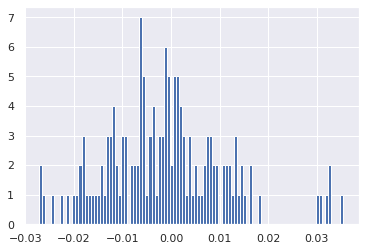

In [87]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

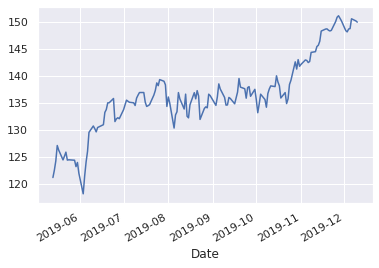

In [88]:
df.Close.plot()

## Filtrowanie danych

In [89]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-12-10,149.97,150.70,149.57,149.94,16612162,149.955,NaN,NaN
2019-12-09,149.88,151.01,149.72,150.17,16874522,150.025,149.94,0.001534
2019-12-06,149.80,150.68,149.08,150.56,16540940,150.180,150.17,0.002597
2019-12-05,148.86,149.13,148.30,148.74,18022835,148.800,150.56,-0.012088
2019-12-04,148.95,148.99,148.02,148.66,17720465,148.805,148.74,-0.000538
...,...,...,...,...,...,...,...,...
2019-05-17,126.44,128.57,126.07,126.20,26150714,126.320,124.38,0.014633
2019-05-16,124.91,127.49,124.62,127.05,30556441,125.980,126.20,0.006735
2019-05-15,122.45,124.87,121.91,124.18,25087426,123.315,127.05,-0.022590


In [94]:
df_positive= df[df.Daily_Change > 0]

In [95]:
df_positive.Daily_Change.mean()

0.009657590251863525

In [96]:
df_negative = df[df.Daily_Change < 0]

In [97]:
df_negative.Daily_Change.mean()

-0.009313612815002264

In [99]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,


In [101]:
df[(df.index > '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-14,145.36,146.75,145.34,146.40,19980001,145.880,148.28,-0.012679
2019-11-13,145.08,145.80,144.63,145.65,17642824,145.365,146.40,-0.005123
2019-11-12,144.63,145.91,144.41,145.41,18861018,145.020,145.65,-0.001648
2019-11-11,143.71,144.77,143.10,144.46,14533776,144.085,145.41,-0.006533
2019-11-08,142.36,144.34,142.14,144.32,16943663,143.340,144.46,-0.000969
2019-11-07,142.22,143.25,142.15,142.64,17989206,142.430,144.32,-0.011641
2019-11-06,142.74,142.89,141.58,142.44,16764505,142.590,142.64,-0.001402
2019-11-05,143.34,143.39,142.29,142.83,18457940,143.085,142.44,0.002738
2019-11-04,143.20,143.37,142.54,142.92,17104533,143.060,142.83,0.000630


In [103]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,142.64,142.79,141.36,142.10,33505514,142.370,142.92,-0.005737
2019-10-01,138.09,138.66,135.46,135.53,22839011,136.810,133.13,0.018027
2019-08-01,135.01,138.88,134.94,136.05,41155819,135.530,134.91,0.008450
2019-07-01,134.64,134.71,133.00,133.71,22988362,134.175,134.59,-0.006538


## Zapis/Odczyt danych z pliku CSV

In [116]:
df = df[df.index <= '2019-12-10']
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,201.66,202.050,200.150,200.87,9485568
2019-12-09,200.65,203.142,200.210,201.34,12013218
2019-12-06,200.50,201.570,200.060,201.05,12279525
2019-12-05,199.86,201.290,198.213,199.36,9755350
2019-12-04,200.00,200.029,198.050,198.71,8459939


In [117]:
df.to_csv('fb.csv')

In [118]:
df_nov = df[(df.index.month == 11) & (df.index.year == 2019)]
df_nov

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29,201.600,203.800,201.210,201.64,7985231
2019-11-27,199.900,203.140,199.420,202.00,12729462
2019-11-26,200.000,200.150,198.039,198.97,11748664
2019-11-25,199.515,200.970,199.250,199.79,15286442
2019-11-22,198.380,199.300,197.620,198.82,9959817
2019-11-21,197.420,199.090,196.860,197.93,12130985
2019-11-20,198.580,199.590,195.430,197.51,12370240
2019-11-19,197.400,200.000,196.860,199.32,19070291
2019-11-18,194.560,198.630,193.050,197.40,16176107


In [119]:
df_nov.to_csv('fb_nov.csv')

In [122]:
new_df = pd.read_csv('fb_nov.csv')
new_df.head(10)

,Date,Open,High,Low,Close,Volume
0,2019-11-29,201.600,203.80,201.210,201.64,7985231
1,2019-11-27,199.900,203.14,199.420,202.00,12729462
2,2019-11-26,200.000,200.15,198.039,198.97,11748664
3,2019-11-25,199.515,200.97,199.250,199.79,15286442
4,2019-11-22,198.380,199.30,197.620,198.82,9959817
5,2019-11-21,197.420,199.09,196.860,197.93,12130985
6,2019-11-20,198.580,199.59,195.430,197.51,12370240
7,2019-11-19,197.400,200.00,196.860,199.32,19070291
8,2019-11-18,194.560,198.63,193.050,197.40,16176107
9,2019-11-15,194.260,195.30,193.380,195.10,11530232


## London Bike Dataset

In [124]:
df = pd.read_csv('london_bike.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [125]:
df.set_index('timestamp')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## Łączenie danych

In [130]:
apple = fetch_financial_data('AAPL')
amazon = fetch_financial_data('AMZN')
google = fetch_financial_data('GOOGL')
uber = fetch_financial_data('UBER')

In [131]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-09-04 to 2015-09-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [132]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-04,120.07,123.70,110.89,120.96,332607163
2020-09-03,126.91,128.84,120.50,120.88,257599640
2020-09-02,137.59,137.98,127.00,131.40,200118991
2020-09-01,132.76,134.80,130.53,134.18,152470142
2020-08-31,127.58,131.00,126.00,129.04,225702688


### Preprocessing

In [133]:
apple.columns = ['apple_' + col.lower() for col in apple.columns]
amazon.columns = ['amazon_' + col.lower() for col in amazon.columns]
google.columns = ['google_' + col.lower() for col in google.columns]
uber.columns = ['uber_' + col.lower() for col in uber.columns]

In [134]:
apple.head()

,apple_open,apple_high,apple_low,apple_close,apple_volume
Date,,,,,
2020-09-04,120.07,123.70,110.89,120.96,332607163
2020-09-03,126.91,128.84,120.50,120.88,257599640
2020-09-02,137.59,137.98,127.00,131.40,200118991
2020-09-01,132.76,134.80,130.53,134.18,152470142
2020-08-31,127.58,131.00,126.00,129.04,225702688


### Konkatenacja danych

In [137]:
df = pd.concat(objs=[apple, amazon, google, uber], axis=1)

In [140]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

df.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_open,1258.00,44.71,20.09,21.12,27.66,41.42,51.84,137.59
apple_high,1258.00,45.18,20.41,21.51,27.81,41.81,52.51,137.98
apple_low,1258.00,44.27,19.77,21.00,27.46,41.01,51.38,130.53
apple_close,1258.00,44.76,20.13,21.20,27.66,41.38,51.77,134.18
apple_volume,1258.00,140293441.01,65565194.89,46073508.00,95608676.00,122581254.00,165743746.00,565092196.00
amazon_open,1258.00,1392.84,646.61,478.01,800.68,1450.22,1820.93,3547.00
amazon_high,1258.00,1407.16,655.50,493.50,806.38,1469.49,1832.36,3552.25
amazon_low,1258.00,1376.78,636.92,474.00,797.73,1425.98,1803.63,3486.68
amazon_close,1258.00,1392.94,646.79,482.07,804.98,1451.40,1819.11,3531.45
amazon_volume,1258.00,4273241.13,2147557.98,881337.00,2821103.50,3709649.50,5112217.25,16552598.00


In [141]:
df.columns

Index(['apple_open', 'apple_high', 'apple_low', 'apple_close', 'apple_volume',
       'amazon_open', 'amazon_high', 'amazon_low', 'amazon_close',
       'amazon_volume', 'google_open', 'google_high', 'google_low',
       'google_close', 'google_volume', 'uber_open', 'uber_high', 'uber_low',
       'uber_close', 'uber_volume'],
      dtype='object')

In [145]:
closes = [col for col in df.columns if col.endswith('close') or col.endswith('volume')]
closes

['apple_close',
 'apple_volume',
 'amazon_close',
 'amazon_volume',
 'google_close',
 'google_volume',
 'uber_close',
 'uber_volume']

In [146]:
df[closes].corr()

,apple_close,apple_volume,amazon_close,amazon_volume,google_close,google_volume,uber_close,uber_volume
apple_close,1.00,0.01,0.93,0.12,0.93,0.06,-0.30,0.10
apple_volume,0.01,1.00,-0.05,0.44,-0.11,0.44,-0.36,0.36
amazon_close,0.93,-0.05,1.00,0.19,0.95,0.07,-0.10,-0.03
amazon_volume,0.12,0.44,0.19,1.00,0.13,0.64,-0.26,0.28
google_close,0.93,-0.11,0.95,0.13,1.00,0.04,-0.18,0.08
google_volume,0.06,0.44,0.07,0.64,0.04,1.00,-0.26,0.34
uber_close,-0.30,-0.36,-0.10,-0.26,-0.18,-0.26,1.00,-0.31
uber_volume,0.10,0.36,-0.03,0.28,0.08,0.34,-0.31,1.00


### Metoda append()

In [147]:
uber

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2020-09-04,33.33,33.65,31.55,33.24,17480617
2020-09-03,34.08,34.74,32.95,33.41,17288823
2020-09-02,34.21,34.51,33.29,34.37,16552685
2020-09-01,33.45,34.51,33.15,34.30,16026170
2020-08-31,33.62,33.92,33.14,33.63,14980621
...,...,...,...,...,...
2019-05-16,41.48,44.06,41.25,43.00,38115524
2019-05-15,39.37,41.88,38.95,41.29,36086065
2019-05-14,38.31,39.96,36.85,39.96,46661147


In [148]:
uber_6 = uber[uber.index.month == 6]

In [149]:
uber_7 = uber[uber.index.month == 7]

In [151]:
uber_6_7 = uber_6.append(uber_7)